<a href="https://colab.research.google.com/github/Jaehyeon-kr/SeoulTech_AI_Class/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [4]:
import tensorflow as tf

# Data loading and preprocessing from previous cells
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='gelu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='gelu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='gelu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='gelu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='gelu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4040 - loss: 1.8994 - val_accuracy: 0.6471 - val_loss: 1.0167
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6471 - loss: 1.0117 - val_accuracy: 0.7163 - val_loss: 0.8130
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6966 - loss: 0.8732 - val_accuracy: 0.7003 - val_loss: 0.8610
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7306 - loss: 0.7801 - val_accuracy: 0.7481 - val_loss: 0.7226
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7490 - loss: 0.7264 - val_accuracy: 0.7536 - val_loss: 0.7134
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7725 - loss: 0.6535 - val_accuracy: 0.7684 - val_loss: 0.6633
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7872 - loss: 0.6178 - val_accuracy: 0.7779 - val_loss: 0.6480
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7969 - loss: 0.588

## Evaluate neural network performance


In [5]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8525 - loss: 0.4885


[0.4884833097457886, 0.8525000214576721]

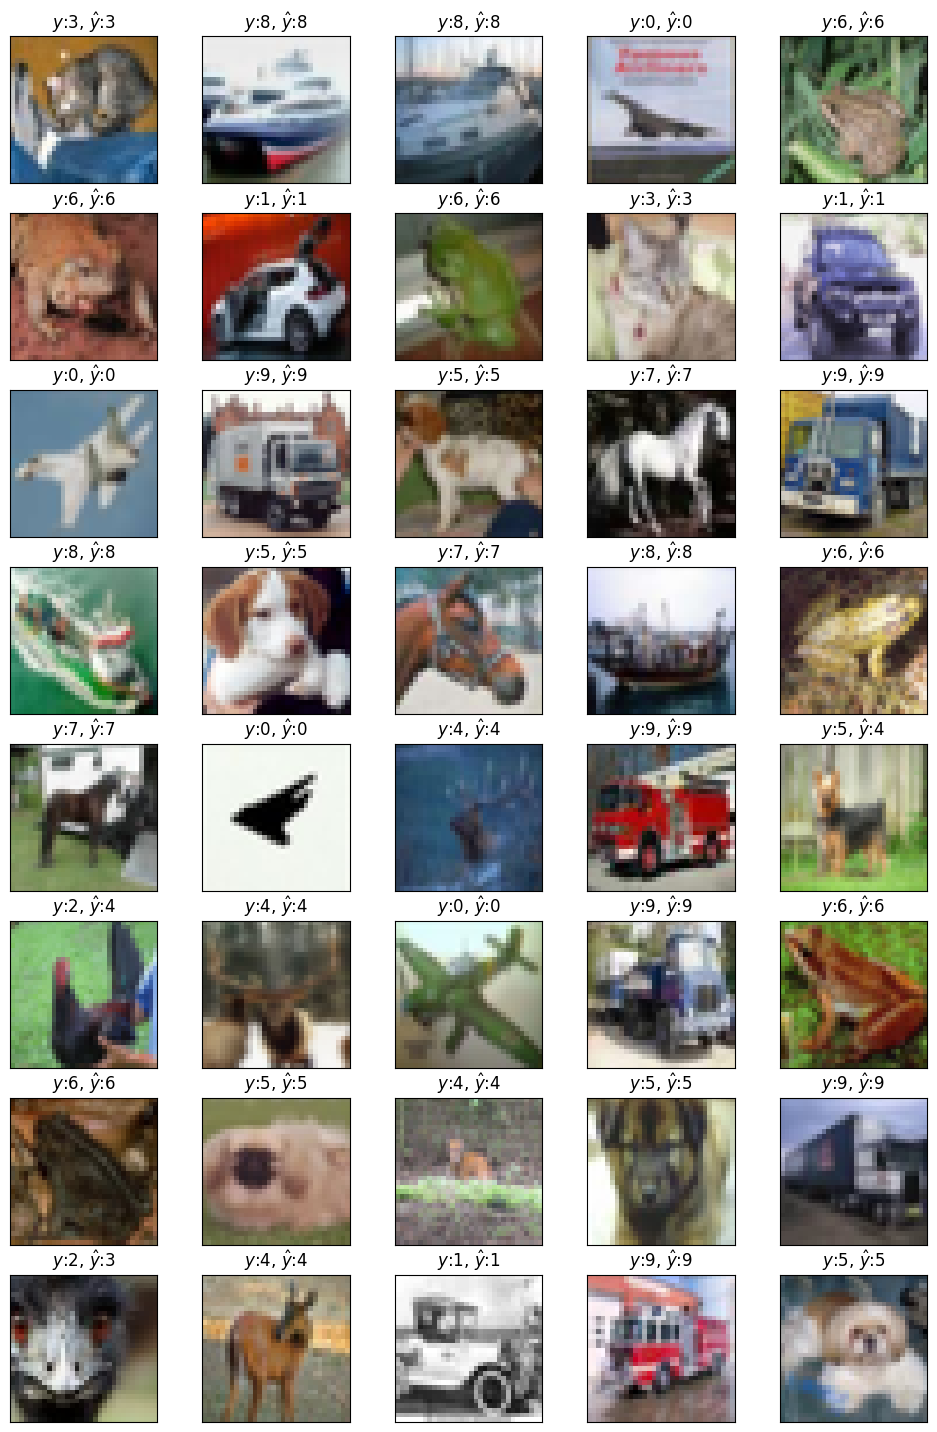

In [6]:
prob = model.predict(x_test[0:40, :], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
  subplot = fig.add_subplot(8, 5, i + 1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  string = r'$\hat{y}$'
  subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')

  subplot.imshow(tf.squeeze(x_test[i]), cmap=plt.cm.gray_r)
plt.show()
